In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import seaborn as sn

In [2]:
#Funcion que pasa a formato datetime las fechas que recibimos.
def datetime(date,format_string):
    return pd.to_datetime(date,format= format_string,errors='coerce')


In [3]:
eventsData = pd.read_csv("EventsConMenosNans.csv")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
eventsData.head()

,Unnamed: 0,timestamp,event,person,url,sku,model,condition,storage,color,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,iphone 5s,NaN,NaN,NaN,...,NaN,NaN,NaN,Camaragibe,Pernambuco,Brazil,NaN,NaN,NaN,NaN
1,1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iphone 5s,Bom,32GB,Cinza espacial,...,NaN,NaN,NaN,Camaragibe,Pernambuco,Brazil,NaN,NaN,NaN,NaN
3,3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iphone 5s,Bom,32GB,Cinza espacial,...,NaN,NaN,NaN,Camaragibe,Pernambuco,Brazil,NaN,NaN,NaN,NaN
4,4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,samsung galaxy s8,Bom,64GB,Dourado,...,NaN,NaN,NaN,Rio de Janeiro,Rio de Janeiro,Brazil,NaN,NaN,NaN,NaN


In [5]:
eventsData.count()

Unnamed: 0                  1011288
timestamp                   1011288
event                       1011288
person                      1011288
url                           82756
sku                          563838
model                        618574
condition                    563836
storage                      563836
color                        563836
skus                         221699
search_term                   48967
staticpage                     3598
campaign_source               82796
search_engine                 50957
channel                       87378
new_vs_returning              87378
city                        1008799
region                      1008799
country                     1008799
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [6]:
eventsData.dtypes

Unnamed: 0                   int64
timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [4]:
eventsData["timestamp"] = datetime(eventsData["timestamp"],"%Y-%m-%dT%H:%M:%S")

Analisis exploratorio

Analisis de eventos

In [8]:
topEvents = eventsData["event"].value_counts()

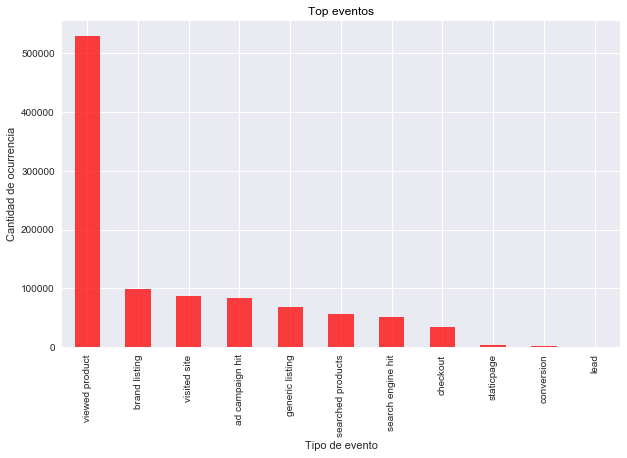

In [9]:

f = plt.figure()

plt.title ('Top eventos',color='black')

ax = topEvents.plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('Tipo de evento')
ax.set_ylabel("Cantidad de ocurrencia")
#plt.show()

plt.savefig('Topeventos',bbox_inches='tight')

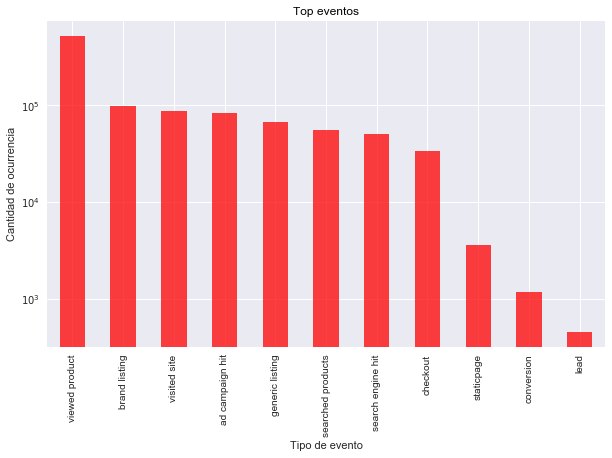

In [10]:

f = plt.figure()

plt.title ('Top eventos',color='black')

ax = topEvents.plot(kind='bar', figsize=(10,6), logy = True ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('Tipo de evento')
ax.set_ylabel("Cantidad de ocurrencia")
#plt.show()

plt.savefig('Topeventoslog',bbox_inches='tight')



Analisis de conversiones por sku

In [11]:
eventsSku = eventsData[["sku","event"]]

In [12]:
eventsSku["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [13]:
eventsSku = eventsSku[eventsSku["event"] == "conversion"]

In [14]:
eventsSku["sku"].isnull().value_counts()

False    1172
Name: sku, dtype: int64

In [15]:
eventsSku["sku"].count()

1172

In [16]:
top5sku = eventsSku["sku"].value_counts()

In [17]:
top5sku[0:5]

6371.0    29
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: sku, dtype: int64

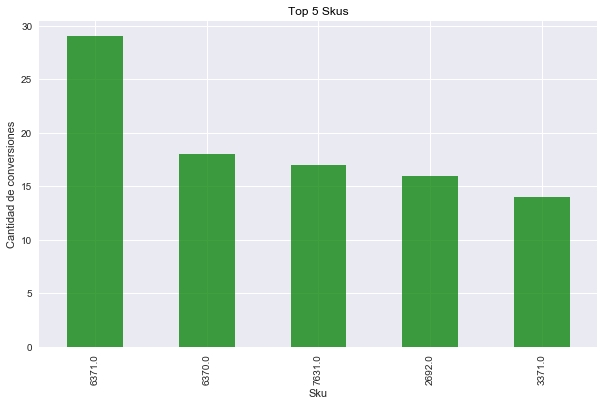

In [18]:

f = plt.figure()

plt.title ('Top 5 Skus',color='black')

ax = top5sku[0:5].plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


ax.set_xlabel('Sku')
ax.set_ylabel("Cantidad de conversiones")
#plt.show()

plt.savefig('Top5skuns.png',bbox_inches='tight')



Analisis de actividad de usuarios

In [19]:
usersData = eventsData[["person","event"]]

In [20]:
usersData.head()

,person,event
0,0004b0a2,ad campaign hit
1,0004b0a2,visited site
2,0004b0a2,viewed product
3,0004b0a2,checkout
4,0006a21a,viewed product


In [21]:
top7users = usersData["person"].value_counts()

In [22]:
top7users = top7users[0:7]

In [23]:
top7users

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
Name: person, dtype: int64

In [24]:
top7users.keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [25]:

usersData.head()

,person,event
0,0004b0a2,ad campaign hit
1,0004b0a2,visited site
2,0004b0a2,viewed product
3,0004b0a2,checkout
4,0006a21a,viewed product


In [26]:
personData = usersData[usersData["person"].isin(top7users.keys())]


In [27]:
top7users.keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [28]:
personData["person"].value_counts().keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [29]:
dataplot = personData#.drop("tasa",axis=1)

In [30]:
dataplot["event"].value_counts(normalize = True)

viewed product       0.534566
brand listing        0.257302
generic listing      0.078376
visited site         0.068060
ad campaign hit      0.035638
searched products    0.014135
search engine hit    0.004220
staticpage           0.003885
checkout             0.002880
conversion           0.000737
lead                 0.000201
Name: event, dtype: float64

In [31]:
dataplot["event"] = dataplot["event"].map({"viewed product": "viewed product", "brand listing": "brand listing", "generic listing":"generic listing", "visited site":"visited site", "ad campaign hit":"ad campaign hit", "searched products" : "others", "search engine hit":"others","staticpage":"others", "checkout": "others","conversion":"others","lead":"others"})

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
dataplot["event"].value_counts()

viewed product     7980
brand listing      3841
generic listing    1170
visited site       1016
ad campaign hit     532
others              389
Name: event, dtype: int64

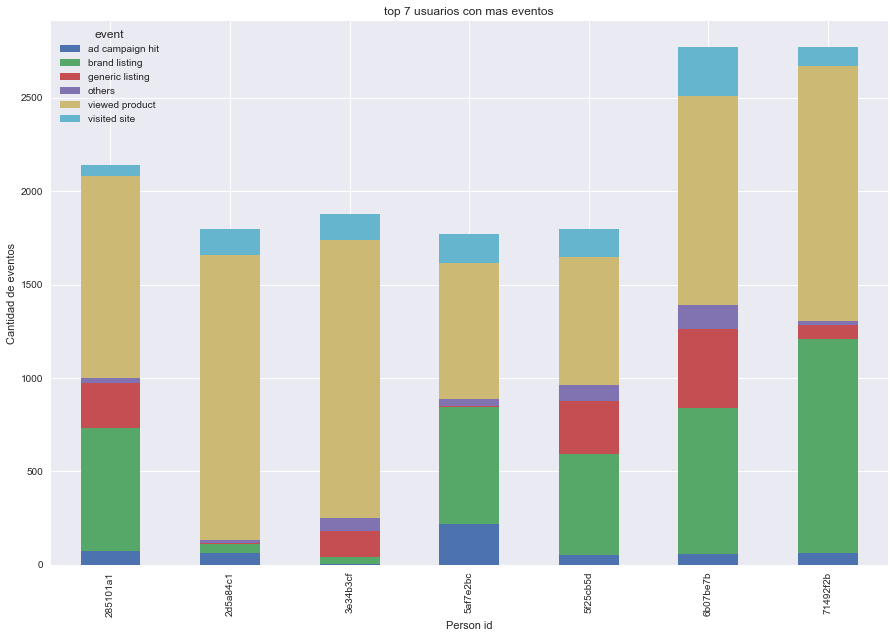

In [33]:

f = plt.figure()
df2 = dataplot.groupby(['person', 'event'],sort = True)['person'].count().unstack('event').fillna(0)
ax =df2.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('top 7 usuarios con mas eventos')
ax.set_xlabel('Person id')

ax.set_ylabel("Cantidad de eventos")
#plt.show()
plt.savefig('usuarios_top.png',bbox_inches='tight')

Analisis de modelos 

In [34]:
modelsselled = eventsData[eventsData["event"] == "conversion"]["model"].value_counts()

In [35]:
modelsselled

samsung galaxy j5                    88
iphone 5s                            84
iphone 6                             71
samsung galaxy s6 flat               39
iphone 6s                            37
iphone 5c                            33
motorola moto g3 4g                  30
motorola moto g4 plus                30
samsung galaxy j7                    28
samsung galaxy a5                    27
samsung galaxy gran prime duos tv    24
samsung galaxy j7 prime              20
samsung galaxy note 4                19
samsung galaxy s7                    18
samsung galaxy s5                    18
samsung galaxy gran prime 3g duos    18
samsung galaxy s3 mini               17
iphone 5                             17
iphone se                            17
motorola moto g2 3g dual             17
samsung galaxy s7 edge               17
iphone 7                             16
samsung galaxy s5 mini duos          16
samsung galaxy win duos              16
samsung galaxy s6 edge               16


In [36]:
modelsselled = modelsselled.to_frame()

In [37]:
modelsselled = modelsselled.reset_index()

In [38]:
modelsselled.head()

,index,model
0,samsung galaxy j5,88
1,iphone 5s,84
2,iphone 6,71
3,samsung galaxy s6 flat,39
4,iphone 6s,37


In [39]:
modelsselled = modelsselled.rename(index=str, columns={"model": "count", "index": "version"})

In [40]:
modelsselled.head()

,version,count
0,samsung galaxy j5,88
1,iphone 5s,84
2,iphone 6,71
3,samsung galaxy s6 flat,39
4,iphone 6s,37


In [41]:
modelsselled["marca"] = modelsselled["version"].map(lambda x: x.split(" ")[0])
modelsselled["model"] = modelsselled["version"].map(lambda x: " ".join(x.split(" ")[1:3]))
modelsselled = modelsselled.drop("version",axis=1)

In [42]:
modelsselled.head()

,count,marca,model
0,88,samsung,galaxy j5
1,84,iphone,5s
2,71,iphone,6
3,39,samsung,galaxy s6
4,37,iphone,6s


In [43]:
modelsselled["marca"] = modelsselled["marca"].map(lambda x: "apple" if (x == "iphone") else x)
modelversionsell1 = modelsselled.groupby(["marca"])["count"].sum()
modelversionsell1

marca
apple       323
asus          2
lenovo       14
lg           20
motorola    149
samsung     641
sony         23
Name: count, dtype: int64

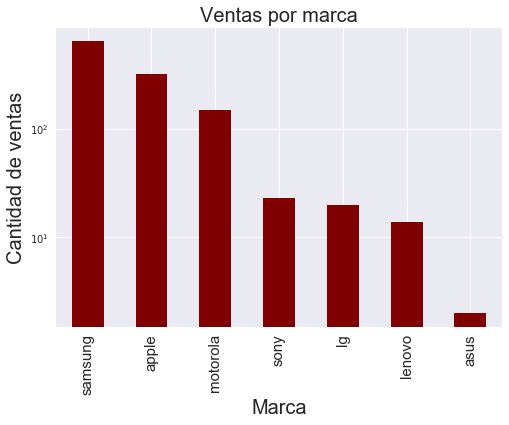

In [45]:

f = plt.figure()
df2 = modelversionsell1
ax =df2.sort_values()[::-1].plot(kind='bar', stacked=True, logy = True, color = "maroon")
plt.title('Ventas por marca', fontsize=20)
ax.set_xlabel('Marca',fontsize = 20)
plt.xticks(size = 15)

ax.set_ylabel("Cantidad de ventas",fontsize = 20)
#plt.show()


plt.savefig('Ventas por marca',bbox_inches='tight')

Analizando Apple

In [46]:
modelsselled2 = modelsselled.groupby(["marca","model"])["count"].sum()

In [47]:
modelsselled2 = modelsselled2.to_frame().reset_index()

In [48]:
modelsselled2.head()

,marca,model,count
0,apple,4g,9
1,apple,4s,10
2,apple,5,17
3,apple,5c,33
4,apple,5s,84


In [49]:
Iphones = modelsselled2[modelsselled2["marca"] == "apple"]
Iphones.head()

,marca,model,count
0,apple,4g,9
1,apple,4s,10
2,apple,5,17
3,apple,5c,33
4,apple,5s,84


In [50]:
Iphones["model"].value_counts()

6          1
4s         1
se         1
5          1
8          1
7 plus     1
6 plus     1
6s         1
5s         1
7          1
6s plus    1
4g         1
5c         1
Name: model, dtype: int64

In [51]:

Iphones["model"] = Iphones["model"].map(lambda x: x[0:1] if(x != "se") else x)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


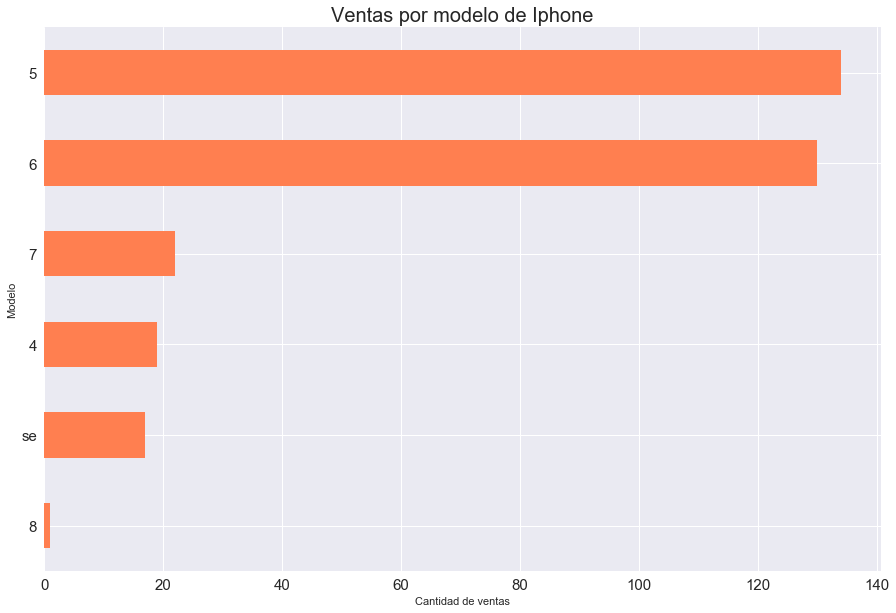

In [53]:
f = plt.figure()

ax =Iphones.groupby(["model"])["count"].sum().sort_values().plot(kind='barh', stacked=True, figsize=(15,10), color = "coral")
plt.title('Ventas por modelo de Iphone', fontsize=20)
ax.set_ylabel('Modelo')
#ax.set_facecolor('xkcd:white')
ax.set_xlabel("Cantidad de ventas")
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.show()
plt.savefig('Ventas por modelo de iphone',bbox_inches='tight')

Analizando Samsung

In [54]:
Samsung = modelsselled2[modelsselled2["marca"] == "samsung"]
Samsung["model"] = Samsung["model"].map(lambda x: x[:len(x)-1] if (x[len(x)-1:].isdigit()) else x)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
Samsung["model"].value_counts()

galaxy s        6
galaxy j        5
galaxy a        4
galaxy e        2
galaxy on       1
galaxy y        1
galaxy note     1
galaxy core     1
galaxy mega     1
gear s          1
galaxy gran     1
galaxy grand    1
galaxy win      1
Name: model, dtype: int64

In [56]:
Samsung["model"] = Samsung["model"].map(lambda x: "Others" if (x in ["galaxy grand","galaxy e","galaxy mega","galaxy on","galaxy y","gear s"]) else x)
SamsungVersion = Samsung.groupby("model")["count"].sum()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


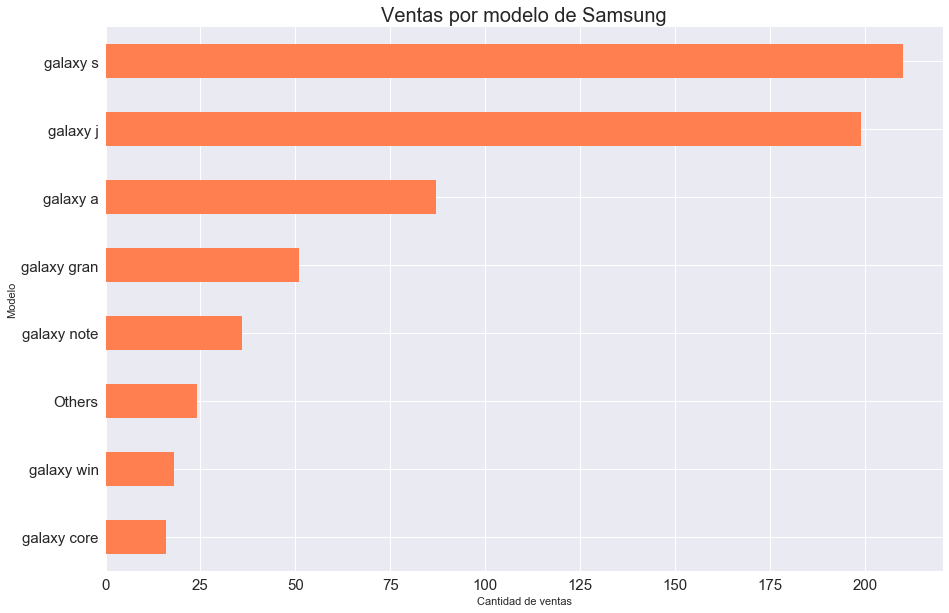

In [57]:
f = plt.figure()

ax =SamsungVersion.sort_values().plot(kind='barh', stacked=True, figsize=(15,10), color = "coral")
plt.title('Ventas por modelo de Samsung',fontsize=20)
ax.set_ylabel('Modelo')
plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel("Cantidad de ventas")
#plt.show()
plt.savefig('ventas por modelo de samsung',bbox_inches='tight')

Analizando Motorola

In [58]:
Motorola = modelsselled2[modelsselled2["marca"] == "motorola"]

In [59]:
Motorola.head()

,marca,model,count
24,motorola,moto e2,8
25,motorola,moto g2,22
26,motorola,moto g3,32
27,motorola,moto g4,46
28,motorola,moto g5,10


In [60]:
Motorola


,marca,model,count
24,motorola,moto e2,8
25,motorola,moto g2,22
26,motorola,moto g3,32
27,motorola,moto g4,46
28,motorola,moto g5,10
29,motorola,moto g5s,1
30,motorola,moto maxx,4
31,motorola,moto x,15
32,motorola,moto x2,5
33,motorola,moto z,5


In [61]:
Motorola["model"] = Motorola["model"].map(lambda x: x.split(" ")[1][0:1] if (x.split(" ")[1] != "maxx") else x.split(" ")[1])
Motorola

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,marca,model,count
24,motorola,e,8
25,motorola,g,22
26,motorola,g,32
27,motorola,g,46
28,motorola,g,10
29,motorola,g,1
30,motorola,maxx,4
31,motorola,x,15
32,motorola,x,5
33,motorola,z,5


In [62]:
MotorolaVersion = Motorola.groupby("model")["count"].sum()

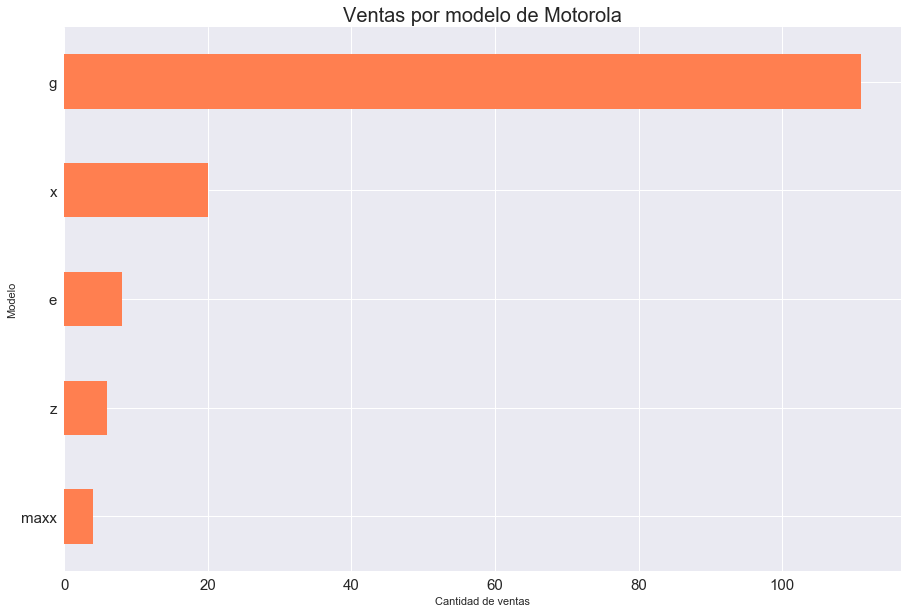

In [63]:
f = plt.figure()

ax =MotorolaVersion.sort_values().plot(kind='barh', stacked=True, figsize=(15,10), color = "coral")
plt.title('Ventas por modelo de Motorola',fontsize=20)
ax.set_ylabel('Modelo')
plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel("Cantidad de ventas")
#plt.show()
plt.savefig('ventas por modelo de motorola',bbox_inches='tight')

In [64]:
eventsData["timestamp"].head()

0   2018-05-31 23:38:05
1   2018-05-31 23:38:05
2   2018-05-31 23:38:09
3   2018-05-31 23:38:40
4   2018-05-29 13:29:25
Name: timestamp, dtype: datetime64[ns]

In [65]:
years = eventsData["timestamp"].map(lambda x: x.year)

In [66]:
years.value_counts()

2018    1011288
Name: timestamp, dtype: int64

In [67]:
month = eventsData["timestamp"].map(lambda x: x.month)

In [68]:
month.value_counts()


5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: timestamp, dtype: int64

In [5]:
monthmodelssell = eventsData[["timestamp","model","event"]]

In [6]:
monthmodelssell.head()

,timestamp,model,event
0,2018-05-31 23:38:05,iphone 5s,ad campaign hit
1,2018-05-31 23:38:05,NaN,visited site
2,2018-05-31 23:38:09,iphone 5s,viewed product
3,2018-05-31 23:38:40,iphone 5s,checkout
4,2018-05-29 13:29:25,samsung galaxy s8,viewed product


In [7]:
monthmodelssell["model"].isnull().value_counts()

False    618574
True     392714
Name: model, dtype: int64

In [8]:
monthmodelssell["month"] = monthmodelssell["timestamp"].map(lambda x: x.strftime('%B'))

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
monthmodelssell["month"] = pd.Categorical(monthmodelssell["month"], categories=['January','February','March','April','May','June'], ordered=True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
monthmodelssell["month"].value_counts()

May         474949
June        281882
April       130008
March        77293
February     27886
January      19270
Name: month, dtype: int64

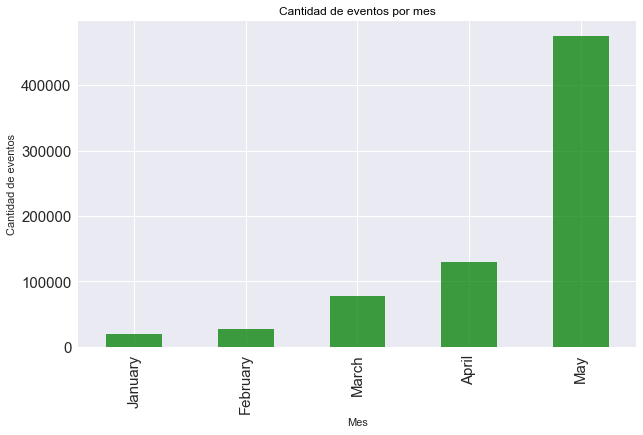

In [11]:

f = plt.figure()

plt.title ('Cantidad de eventos por mes',color='black')

ax = monthmodelssell["month"].value_counts().drop(labels = ["June"]).sort_index().plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )

plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel('Mes')
ax.set_ylabel("Cantidad de eventos")
#plt.show()
plt.savefig('Cantidad de eventos por mes',bbox_inches='tight')

In [18]:
monthconversionformodel = monthmodelssell[monthmodelssell["event"] == "conversion"]

In [19]:
monthconversionformodel.head()

,timestamp,model,event,month
220,2018-03-20 17:46:12,motorola moto x2,conversion,March
2282,2018-04-26 22:28:53,samsung galaxy core plus duos tv,conversion,April
2547,2018-06-10 14:37:50,samsung galaxy s6 flat,conversion,June
4245,2018-03-16 13:50:25,iphone 5s,conversion,March
6985,2018-02-09 22:07:07,samsung galaxy j5,conversion,February


In [20]:

monthconversionformodel['month'] = pd.Categorical(monthconversionformodel['month'], categories=['January','February','March','April','May','June'], ordered=True)



/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
monthconversionformodel.head()

,timestamp,model,event,month
220,2018-03-20 17:46:12,motorola moto x2,conversion,March
2282,2018-04-26 22:28:53,samsung galaxy core plus duos tv,conversion,April
2547,2018-06-10 14:37:50,samsung galaxy s6 flat,conversion,June
4245,2018-03-16 13:50:25,iphone 5s,conversion,March
6985,2018-02-09 22:07:07,samsung galaxy j5,conversion,February


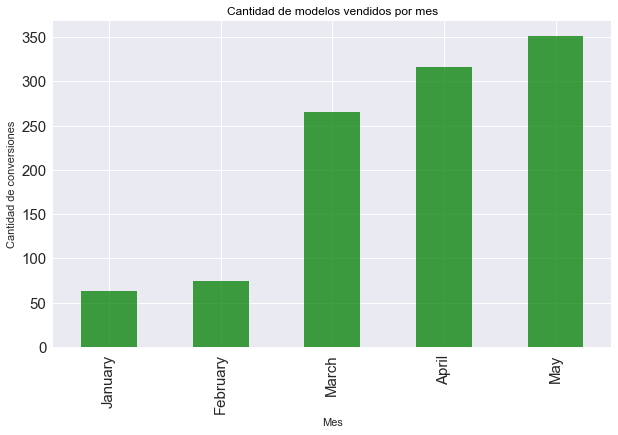

In [22]:

f = plt.figure()

plt.title ('Cantidad de modelos vendidos por mes',color='black')

ax = monthconversionformodel["month"].value_counts().drop(labels = ["June"]).sort_index().plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel('Mes')
ax.set_ylabel("Cantidad de conversiones")
#plt.show()



plt.savefig('Cantidad de modelos vendidos por mes',bbox_inches='tight')

In [23]:
daysell = monthmodelssell[monthmodelssell["event"] == "conversion"]

In [24]:
daysell.head()

,timestamp,model,event,month
220,2018-03-20 17:46:12,motorola moto x2,conversion,March
2282,2018-04-26 22:28:53,samsung galaxy core plus duos tv,conversion,April
2547,2018-06-10 14:37:50,samsung galaxy s6 flat,conversion,June
4245,2018-03-16 13:50:25,iphone 5s,conversion,March
6985,2018-02-09 22:07:07,samsung galaxy j5,conversion,February


In [25]:
daysell["weekday"] = daysell.apply(lambda x: dt.datetime.strftime(x['timestamp'], '%A'), axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
daysell.head()

,timestamp,model,event,month,weekday
220,2018-03-20 17:46:12,motorola moto x2,conversion,March,Tuesday
2282,2018-04-26 22:28:53,samsung galaxy core plus duos tv,conversion,April,Thursday
2547,2018-06-10 14:37:50,samsung galaxy s6 flat,conversion,June,Sunday
4245,2018-03-16 13:50:25,iphone 5s,conversion,March,Friday
6985,2018-02-09 22:07:07,samsung galaxy j5,conversion,February,Friday


In [27]:
modelsellperdays = daysell["weekday"].value_counts().reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

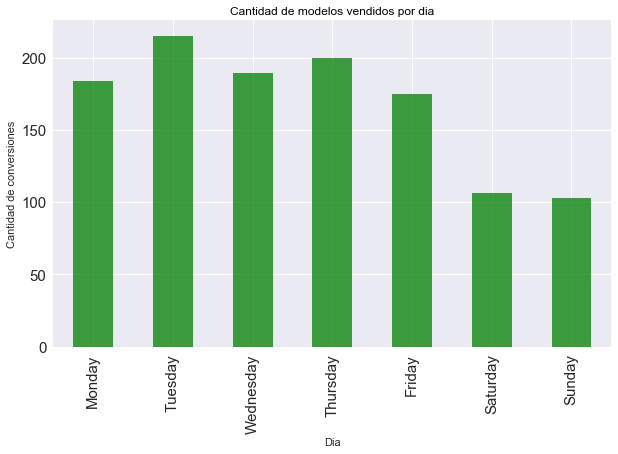

In [28]:

f = plt.figure()

plt.title ('Cantidad de modelos vendidos por dia',color='black')

ax = modelsellperdays.plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.set_xlabel('Dia')
ax.set_ylabel("Cantidad de conversiones")
#plt.show()

plt.savefig('cantidad de modelos vendidos por dia',bbox_inches='tight')


In [29]:
dayevents = monthmodelssell

In [30]:
dayevents["weekday"] = dayevents.apply(lambda x: dt.datetime.strftime(x['timestamp'], '%A'), axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
dayevents.head()

,timestamp,model,event,month,weekday
0,2018-05-31 23:38:05,iphone 5s,ad campaign hit,May,Thursday
1,2018-05-31 23:38:05,NaN,visited site,May,Thursday
2,2018-05-31 23:38:09,iphone 5s,viewed product,May,Thursday
3,2018-05-31 23:38:40,iphone 5s,checkout,May,Thursday
4,2018-05-29 13:29:25,samsung galaxy s8,viewed product,May,Tuesday


In [32]:
dayforevents = dayevents[["weekday","event"]]

In [33]:
dayforevents.head()

,weekday,event
0,Thursday,ad campaign hit
1,Thursday,visited site
2,Thursday,viewed product
3,Thursday,checkout
4,Tuesday,viewed product


In [34]:
dayforevents["count"] = 1
dayforevents.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,weekday,event,count
0,Thursday,ad campaign hit,1
1,Thursday,visited site,1
2,Thursday,viewed product,1
3,Thursday,checkout,1
4,Tuesday,viewed product,1


In [35]:
pivot_table = dayforevents.pivot_table(index='weekday',columns='event',values='count',aggfunc=np.sum)

Analsis por Id de usuario

In [36]:
hoursevents = dayevents

In [37]:
hoursevents["hour"] = hoursevents["timestamp"].map(lambda x: x.hour)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
hoursevents.head()

,timestamp,model,event,month,weekday,hour
0,2018-05-31 23:38:05,iphone 5s,ad campaign hit,May,Thursday,23
1,2018-05-31 23:38:05,NaN,visited site,May,Thursday,23
2,2018-05-31 23:38:09,iphone 5s,viewed product,May,Thursday,23
3,2018-05-31 23:38:40,iphone 5s,checkout,May,Thursday,23
4,2018-05-29 13:29:25,samsung galaxy s8,viewed product,May,Tuesday,13


In [39]:
hoursevents = hoursevents[["event","hour"]]
hoursevents.head()

,event,hour
0,ad campaign hit,23
1,visited site,23
2,viewed product,23
3,checkout,23
4,viewed product,13


In [40]:
hoursevents["hour"].value_counts().sort_index()

0     64378
1     58978
2     48536
3     33118
4     18838
5     11335
6      6257
7      3910
8      4623
9      8077
10    16639
11    32884
12    47426
13    55684
14    60211
15    58852
16    64637
17    60560
18    57614
19    58398
20    56378
21    58867
22    59412
23    65676
Name: hour, dtype: int64

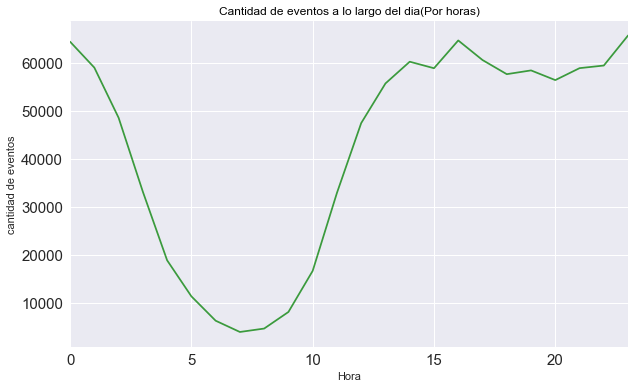

In [41]:

f = plt.figure()

plt.title ('Cantidad de eventos a lo largo del dia(Por horas)',color='black')

ax = hoursevents["hour"].value_counts().sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )


plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel('Hora')
ax.set_ylabel("cantidad de eventos")
#plt.show()


plt.savefig('cantidad de eventos a lo largo del dia',bbox_inches='tight')



In [42]:
hourseventsconversion = hoursevents[hoursevents["event"] == "conversion"]
hourseventsconversion.head()

,event,hour
220,conversion,17
2282,conversion,22
2547,conversion,14
4245,conversion,13
6985,conversion,22


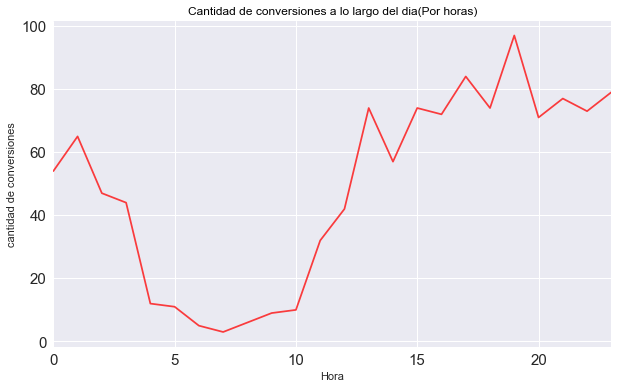

In [43]:

f = plt.figure()

plt.title ('Cantidad de conversiones a lo largo del dia(Por horas)',color='black')


ax= hourseventsconversion["hour"].value_counts().sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='red' )
ax.set_xlabel('Hora')
ax.set_ylabel("cantidad de conversiones")

plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.show()

plt.savefig('cantidad de conversiones a lo largo del dia',bbox_inches='tight')

Analisis segun la region/pais/ciudad 

In [104]:
eventsData["country"].isnull().value_counts()

False    1008799
True        2489
Name: country, dtype: int64

In [105]:
eventsData["region"].isnull().value_counts()

False    1008799
True        2489
Name: region, dtype: int64

In [106]:
eventsData["city"].isnull().value_counts()

False    1008799
True        2489
Name: city, dtype: int64

In [107]:
eventsData["country"].value_counts()

Brazil                971886
Unknown                29547
United States           3640
Canada                  1372
Argentina                650
Netherlands              198
France                   190
Russia                   175
Italy                    169
Switzerland              137
Colombia                 116
Japan                    105
French Guiana             82
Mozambique                62
Portugal                  52
United Kingdom            52
Germany                   52
Poland                    51
Romania                   33
Dominican Republic        29
China                     28
Paraguay                  20
Bangladesh                17
Belize                    13
India                     12
Morocco                   12
Angola                     8
Saudi Arabia               7
Uruguay                    7
Uzbekistan                 7
Guadeloupe                 6
Spain                      6
Mexico                     6
Peru                       6
Denmark       

In [108]:
eventsData["region"].value_counts()

Sao Paulo                     285895
Unknown                       177654
Minas Gerais                   84064
Rio de Janeiro                 78271
Bahia                          64356
Ceara                          33895
Rio Grande do Sul              33752
Pernambuco                     32191
Parana                         31557
Goias                          20554
Federal District               19608
Espirito Santo                 17811
Santa Catarina                 16764
Para                           16038
Maranhao                       14374
Rio Grande do Norte            12150
Paraíba                        10415
Piaui                           8171
Alagoas                         7965
Tocantins                       7577
Amazonas                        7202
Mato Grosso                     6111
Mato Grosso do Sul              5194
Rondonia                        4271
Sergipe                         4047
Acre                            1402
Amapa                           1115
C

In [109]:
eventsData["city"].value_counts()

Unknown                       192347
São Paulo                     116107
Rio de Janeiro                 34478
Belo Horizonte                 23419
Salvador                       22940
Brasília                       16655
Fortaleza                      12924
Osasco                         11033
Curitiba                       10284
Guarulhos                       9818
Goiânia                         9745
Porto Alegre                    9518
Santo André                     9053
Recife                          8896
São Bernardo do Campo           8152
Belém                           6691
Campinas                        5788
Manaus                          5755
São Luís                        5581
Natal                           5155
Nova Iguaçu                     4916
Petrolina                       4890
Sorocaba                        4852
Duque de Caxias                 4814
Contagem                        4389
Montes Claros                   4082
Barueri                         3965
C

Analisis con modelo y viewed

In [110]:
viewedmodel = eventsData[eventsData["event"] == "viewed product"]

In [111]:
viewedmodel["model"].value_counts()

iphone 6                                     47538
iphone 5s                                    42045
iphone 6s                                    36930
iphone 7                                     26330
samsung galaxy s7 edge                       23062
samsung galaxy s7                            18085
iphone 7 plus                                17853
iphone se                                    15874
samsung galaxy s8                            15868
iphone 6s plus                               12250
iphone 6 plus                                12098
iphone 5c                                    12049
samsung galaxy j5                            11036
samsung galaxy s6 flat                       10724
samsung galaxy s6 edge                       10580
samsung galaxy s8 plus                       10006
iphone 5                                      8846
samsung galaxy j7 prime                       8400
motorola moto g4 plus                         7522
motorola moto x play 4g dual   

In [112]:
dataCountry = eventsData[["timestamp","city","region","country"]]

In [113]:
dataCountry.head()

,timestamp,city,region,country
0,2018-05-31 23:38:05,Camaragibe,Pernambuco,Brazil
1,2018-05-31 23:38:05,Camaragibe,Pernambuco,Brazil
2,2018-05-31 23:38:09,Camaragibe,Pernambuco,Brazil
3,2018-05-31 23:38:40,Camaragibe,Pernambuco,Brazil
4,2018-05-29 13:29:25,Rio de Janeiro,Rio de Janeiro,Brazil


In [114]:
dataCountry["month"] = dataCountry["timestamp"].map(lambda x: x.month)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
dataCountry["month"].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [116]:
dataCountry.dropna(subset = ["country"])["month"].value_counts()

5    473733
6    280631
4    130007
3     77272
2     27886
1     19270
Name: month, dtype: int64

In [117]:
dataCountry["country"].value_counts()

Brazil                971886
Unknown                29547
United States           3640
Canada                  1372
Argentina                650
Netherlands              198
France                   190
Russia                   175
Italy                    169
Switzerland              137
Colombia                 116
Japan                    105
French Guiana             82
Mozambique                62
Portugal                  52
United Kingdom            52
Germany                   52
Poland                    51
Romania                   33
Dominican Republic        29
China                     28
Paraguay                  20
Bangladesh                17
Belize                    13
India                     12
Morocco                   12
Angola                     8
Saudi Arabia               7
Uruguay                    7
Uzbekistan                 7
Guadeloupe                 6
Spain                      6
Mexico                     6
Peru                       6
Denmark       

In [118]:
eventsData["browser_version"].value_counts()

Chrome 66.0               22611
Chrome Mobile 66.0        17513
Chrome 65.0                6635
Chrome Mobile 65.0         5665
Chrome Mobile 64.0         3083
Chrome 67.0                3073
Chrome Mobile 67.0         2683
Chrome 64.0                2450
Mobile Safari 11           2071
Chrome Mobile 39           1639
Chrome 63.0                1490
Chrome Mobile 63.0         1413
Samsung Internet 6.4       1056
Firefox 60                 1049
Firefox 59                  918
Mobile Safari 10            703
Edge 16.16299               658
Chrome 49.0                 602
Chrome Mobile 62.0          568
Chrome Mobile 55.0          527
Chrome Mobile 43.0          422
Chrome Mobile 61.0          390
IE 11                       385
Opera 53.0                  271
Opera 52.0                  269
Chrome Mobile 56.0          264
Chrome Mobile 57.0          262
Chrome Mobile 58.0          255
Chrome Mobile 59.0          254
Chrome Mobile 50.0          246
                          ...  
Opera Mi

In [143]:
browsers = eventsData.dropna(subset = ["browser_version"])
browsers["browser_version"].map(lambda x: x.split(" ")[0]).value_counts(normalize = True)

Chrome       0.859908
Mobile       0.037069
Firefox      0.029927
Samsung      0.019444
Facebook     0.016194
Edge         0.013104
Opera        0.007885
IE           0.007359
Android      0.003971
Safari       0.001865
UC           0.001556
Chromium     0.000458
Vivaldi      0.000435
Other        0.000240
Maxthon      0.000183
Puffin       0.000114
Yandex       0.000114
Dragon       0.000057
Amazon       0.000034
Iron         0.000034
Pinterest    0.000023
Pale         0.000011
Crosswalk    0.000011
Name: browser_version, dtype: float64

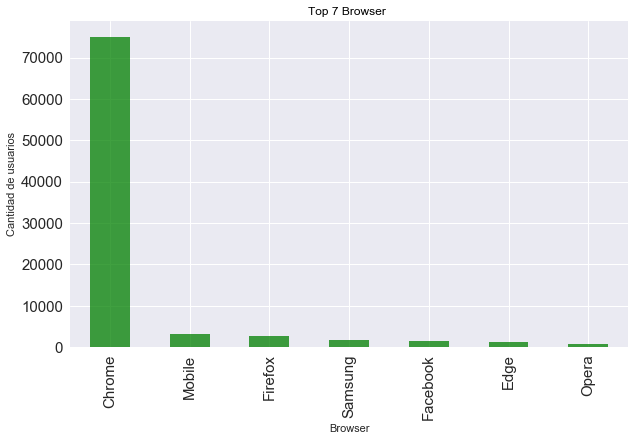

In [144]:

f = plt.figure()

plt.title ('Top 7 Browser ',color='black')

ax = browsers["browser_version"].map(lambda x: x.split(" ")[0]).value_counts()[0:7].plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel('Browser')
ax.set_ylabel("Cantidad de usuarios")
#plt.show()

plt.savefig('top7browser',bbox_inches='tight')




In [145]:
browsers["browser_version"] = browsers["browser_version"].map(lambda x: x.split(" ")[0]).map(lambda x: "Safari" if (x == "Mobile") else x)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


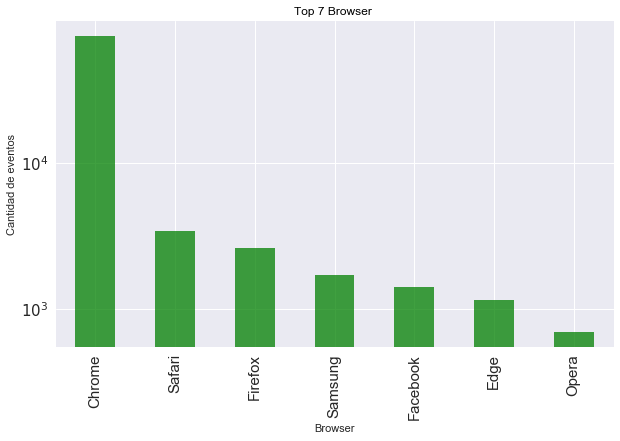

In [146]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top 7 Browser ',color='black')

ax = browsers["browser_version"].value_counts()[0:7].plot(kind='bar', figsize=(10,6) ,alpha=0.75, logy = True, ax=f.gca(), color='green' )


plt.xticks(size = 15)
plt.yticks(size = 15)
ax.set_xlabel('Browser')
ax.set_ylabel("Cantidad de eventos")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top7browserlog',bbox_inches='tight')





In [147]:
browsers_device = browsers[["browser_version","device_type"]]

In [148]:
browsers_device = browsers_device[browsers_device["device_type"] != "Unknown"]

In [149]:
browsers_device["device_type"] = browsers_device["device_type"].map(lambda x: "Smartphone" if (x=="Tablet") else x)

In [150]:
browsers_device["device_type"].value_counts()

Smartphone    45473
Computer      41790
Name: device_type, dtype: int64

In [151]:
browsers_device["count"] = 1
browsers_device.head()

,browser_version,device_type,count
1,Chrome,Smartphone,1
5,Android,Smartphone,1
9,Chrome,Computer,1
16,Chrome,Computer,1
45,Chrome,Computer,1


In [152]:
browsers_device = browsers_device[browsers_device["browser_version"].isin(["Chrome","Safari","Firefox","Samsung","Facebook","Edge","Opera"])]

In [153]:
browsers_device = browsers_device.groupby(["browser_version","device_type"],as_index = False).count()

In [158]:
browsers_device = browsers_device.sort_values("count",ascending = False)

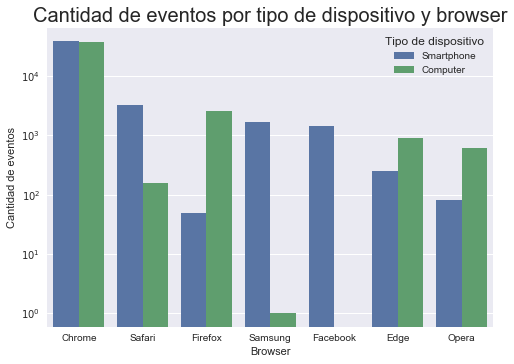

In [159]:
import seaborn as sns

g = sns.barplot(x='browser_version', y='count', hue='device_type', data=browsers_device)
g.set_yscale('log')
plt.ylabel('Cantidad de eventos')
plt.xlabel('Browser')
g.legend(title = "Tipo de dispositivo")
plt.title('Cantidad de eventos por tipo de dispositivo y browser', fontsize = 20);
plt.savefig('cantidad de evento por tipo de dispostivio y browser',bbox_inches='tight')


Analisis por tipo de eventos 

In [133]:
events = eventsData[["person","event","channel","new_vs_returning"]]

In [134]:
events.head()

,person,event,channel,new_vs_returning
0,0004b0a2,ad campaign hit,NaN,NaN
1,0004b0a2,visited site,Paid,New
2,0004b0a2,viewed product,NaN,NaN
3,0004b0a2,checkout,NaN,NaN
4,0006a21a,viewed product,NaN,NaN


In [135]:
events = events[events["event"] == "visited site"]

In [136]:
events["channel"].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [137]:
events["count"] = 1

In [138]:
count_new_returning_channel = events.groupby(["channel","new_vs_returning"])["count"].sum().drop("Unknown")

In [139]:
count_new_returning_channel = count_new_returning_channel.to_frame().reset_index()
count_new_returning_channel.head()

,channel,new_vs_returning,count
0,Direct,New,2207
1,Direct,Returning,16315
2,Email,New,10
3,Email,Returning,66
4,Organic,New,5709


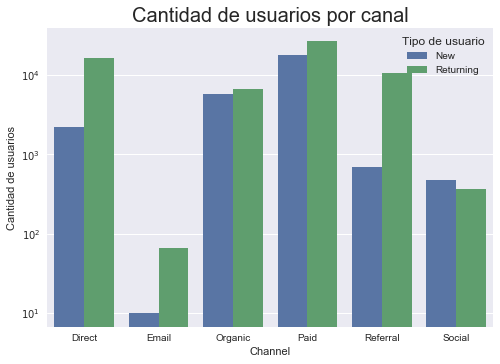

In [140]:
import seaborn as sns

g = sns.barplot(x='channel', y='count', hue='new_vs_returning', data=count_new_returning_channel)
g.set_yscale('log')
plt.ylabel('Cantidad de usuarios')
plt.xlabel('Channel')
g.legend(title = "Tipo de usuario")
plt.title('Cantidad de usuarios por canal', fontsize = 20);
plt.savefig('Cantidad de usuarios por canal',bbox_inches='tight')

Analisis de feriados Brasil

In [13]:
BrasilData = eventsData[eventsData["country"] == "Brazil"]

In [14]:
BrasilData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


In [15]:
BrasilData = BrasilData[["timestamp","event"]]

In [16]:
BrasilData["month"] = BrasilData["timestamp"].map(lambda x: x.month)

In [17]:
BrasilData["day"] = BrasilData["timestamp"].map(lambda x: x.day)

In [18]:
BrasilData.head()

,timestamp,event,month,day
1,2018-05-31 23:38:05,visited site,5,31
5,2018-05-29 13:29:26,visited site,5,29
9,2018-04-09 20:12:31,visited site,4,9
16,2018-05-24 11:21:07,visited site,5,24
45,2018-04-06 05:12:05,visited site,4,6


In [117]:
BrasilData["event"].value_counts()

visited site    84308
Name: event, dtype: int64

In [121]:
SpecialDays = {}
SpecialDays[1] = [1]
#SpecialDays[2] = [13,14]
SpecialDays[3] = [30]
SpecialDays[4] = [21]
SpecialDays[5] = [1]
#SpecialDays[6] = [12]

In [24]:
BrasilData["EsDiaEspecial"] = False
BrasilData["EsDiaEspecial"] = BrasilData["timestamp"].map(lambda x:True if( x.day in SpecialDays[x.month]) else False)

In [26]:
BrasilData["EsDiaEspecial"].value_counts()

False    79372
True      4936
Name: EsDiaEspecial, dtype: int64

In [113]:
January = BrasilData[BrasilData["month"] == 1]
February = BrasilData[BrasilData["month"] == 2]
March = BrasilData[BrasilData["month"] == 3]
April = BrasilData[BrasilData["month"] == 4]
May = BrasilData[BrasilData["month"] == 5]
June = BrasilData[BrasilData["month"] == 6]

In [66]:
June["day"].value_counts()

5     1913
4     1840
6     1709
7     1651
1     1631
8     1475
11    1427
2     1393
13    1390
3     1324
12    1309
14    1260
9     1167
15    1058
10     978
Name: day, dtype: int64

In [45]:
events_January = January["day"].value_counts()

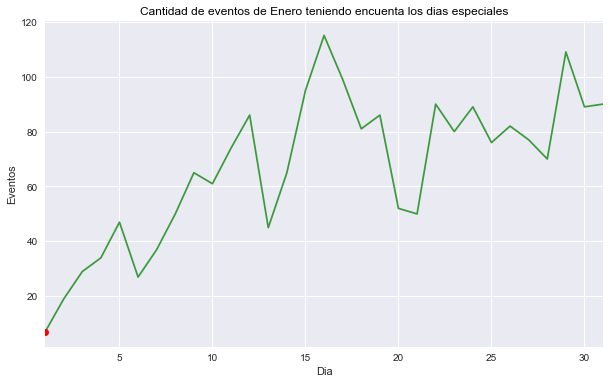

In [47]:

f = plt.figure()

plt.title ('Cantidad de eventos de Enero teniendo encuenta los dias especiales',color='black')

ax = events_January.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )

plt.plot([1],[events_January[1]], 'ro')
ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()

plt.savefig('cantidad de eventos Enero',bbox_inches='tight')



,timestamp,event,month,day,EsDiaEspcial,EsDiaEspecial
842,2018-02-12 12:17:40,visited site,2,12,False,False
911,2018-02-14 19:46:03,visited site,2,14,True,True
923,2018-02-23 07:18:19,visited site,2,23,False,False
2126,2018-02-03 22:21:18,visited site,2,3,False,False
2131,2018-02-08 00:41:45,visited site,2,8,False,False


In [112]:
February["event"].value_counts()

Series([], Name: event, dtype: int64)

In [118]:

events_February = February["day"].value_counts()

In [119]:
February["event"].value_counts()

visited site    2725
Name: event, dtype: int64

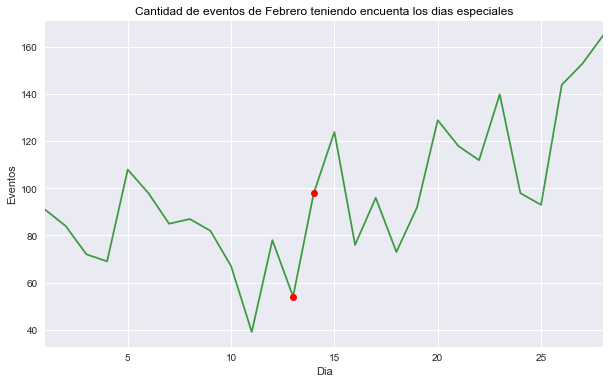

In [120]:

f = plt.figure()

plt.title ('Cantidad de eventos de Febrero teniendo encuenta los dias especiales',color='black')

ax = events_Febraury.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )
for day in SpecialDays[2]:
    plt.plot([day],[events_February[day]], 'ro')
ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()

plt.savefig('cantidad de eventos Febrero',bbox_inches='tight')




In [56]:
events_March = March["day"].value_counts()

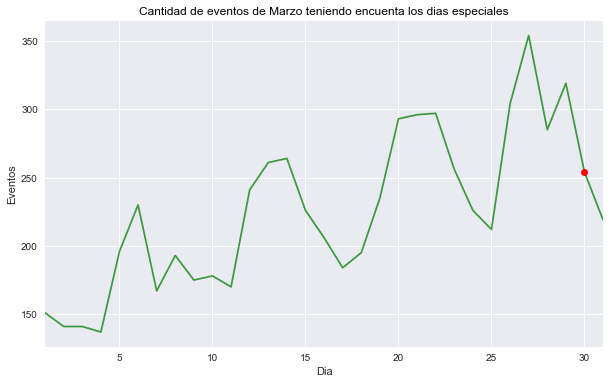

In [122]:

f = plt.figure()

plt.title ('Cantidad de eventos de Marzo teniendo encuenta los dias especiales',color='black')

ax = events_March.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )
for day in SpecialDays[3]:
    plt.plot([day],[events_March[day]], 'ro')


ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()

plt.savefig('cantidad de eventos Marzo',bbox_inches='tight')




In [123]:
events_April = April["day"].value_counts()

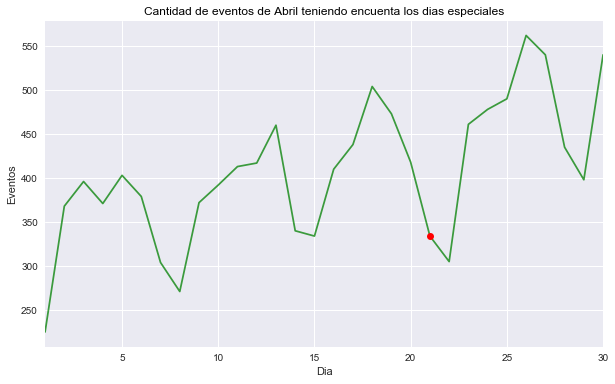

In [124]:

f = plt.figure()

plt.title ('Cantidad de eventos de Abril teniendo encuenta los dias especiales',color='black')

ax = events_April.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )
for day in SpecialDays[4]:
    plt.plot([day],[events_April[day]], 'ro')


ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()

plt.savefig('cantidad de eventos Abril',bbox_inches='tight')




In [125]:
events_May = May["day"].value_counts()

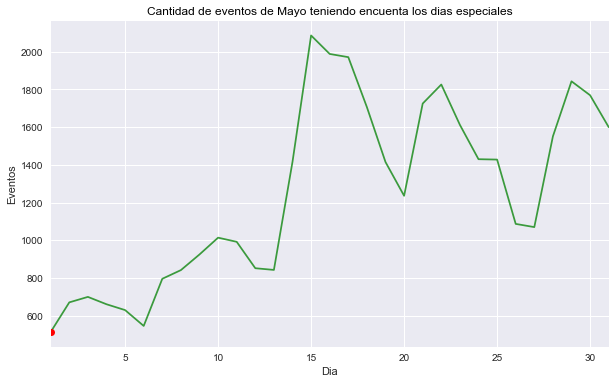

In [126]:

f = plt.figure()

plt.title ('Cantidad de eventos de Mayo teniendo encuenta los dias especiales',color='black')

ax = events_May.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )
for day in SpecialDays[5]:
    plt.plot([day],[events_May[day]], 'ro')


ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()

plt.savefig('cantidad de eventos Mayo',bbox_inches='tight')




In [64]:
events_June = June["day"].value_counts()

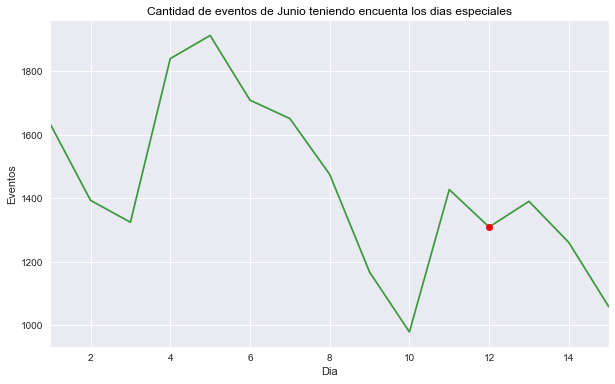

In [107]:

f = plt.figure()

plt.title ('Cantidad de eventos de Junio teniendo encuenta los dias especiales',color='black')

ax = events_June.sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )
for day in SpecialDays[6]:
    plt.plot([day],[events_June[day]], 'ro')


ax.set_xlabel('Dia')
ax.set_ylabel("Eventos")
#plt.show()
plt.savefig('cantidad de eventos Junio',bbox_inches='tight')


